<a href="https://colab.research.google.com/github/superahxd/sec1_project/blob/main/sec1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💥GOAL

다음 분기에 어떤 게임을 설계해야 할까

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 🕹️ Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [263]:
import pandas as pd

vgames = pd.read_csv('/content/vgames2.csv')

In [264]:
vgames.head(34)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [265]:
vgames=vgames.replace('N/A',np.nan)
vgames=vgames.dropna()

In [266]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return float(x)


vgames['NA_Sales']=vgames['NA_Sales'].apply(value_to_float)
vgames['EU_Sales']=vgames['EU_Sales'].apply(value_to_float)
vgames['JP_Sales']=vgames['JP_Sales'].apply(value_to_float)
vgames['Other_Sales']=vgames['Other_Sales'].apply(value_to_float)

In [267]:
def million(x):
 if x <= 100:
   return x * 1000000.0
 else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(million)
vgames['EU_Sales']=vgames['EU_Sales'].apply(million)
vgames['JP_Sales']=vgames['JP_Sales'].apply(million)
vgames['Other_Sales']=vgames['Other_Sales'].apply(million)

In [268]:
def division(x):
  if x > 0:
    return x / 1000
  else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(division)
vgames['EU_Sales']=vgames['EU_Sales'].apply(division)
vgames['JP_Sales']=vgames['JP_Sales'].apply(division)
vgames['Other_Sales']=vgames['Other_Sales'].apply(division)

In [269]:
def year(x):
  if x >= 80 and x <= 100:
   return x + 1900
  elif x < 80:
   return x + 2000
  else : return float(x)

vgames['Year']=vgames['Year'].apply(year)

In [270]:
vgames=vgames.iloc[:,1:]
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


1. 🌏지역에 따른 게임 장르 선호도

지역에 따라서 선호하는 게임 장르가 다를까



In [271]:
import matplotlib.pyplot as plt
import numpy as np

In [272]:
vgames['Genre'] = vgames['Genre'].dropna()
vgames_1=vgames.iloc[:,3:]
vgames_1

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Destineer,40.0,0.0,0.0,0.0
1,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...
16593,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [273]:
vgames_sum= vgames_1.groupby(['Genre']).sum()
vgames_sum= vgames_sum.T

In [274]:
vgames_mean= vgames_1.groupby(['Genre']).mean()
vgames_mean= vgames_mean.T
vgames_mean

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,265.046296,80.276025,263.892216,234.818560,510.171821,214.805654,290.976210,217.583618,448.812500,214.456265,290.239234,101.390135
EU_Sales,158.530864,50.205047,119.640719,123.825104,229.816724,89.169611,192.797375,124.976109,242.367188,133.557920,161.361462,66.995516
JP_Sales,48.333333,40.906940,104.359281,61.975015,149.518900,99.363958,46.201805,234.081911,29.828125,75.106383,58.616790,73.393124
Other_Sales,56.787037,13.170347,43.293413,43.212374,58.934708,21.978799,62.764561,38.723549,79.578125,37.021277,57.568508,16.786248


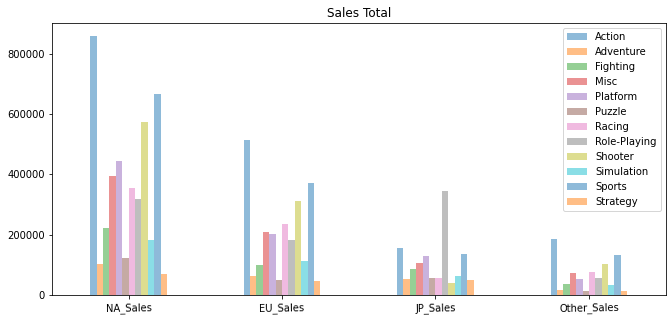

In [275]:
vgames_sum.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Total')
plt.legend(loc='best')

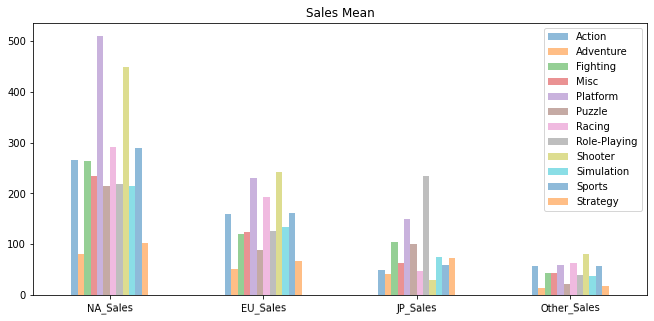

In [276]:
vgames_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Mean')
plt.legend(loc='best')

In [277]:
vgames_1.rank(method='min', ascending=False)

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,13002.0,12572.0,9723.0,10635.0,6069.0,9923.0
1,13002.0,6789.0,5093.0,10635.0,6069.0,6555.0
2,11734.0,14613.0,11821.0,10635.0,4659.0,9923.0
3,9218.0,38.0,9723.0,10635.0,6069.0,9923.0
4,8345.0,12822.0,6343.0,4429.0,6069.0,3429.0
...,...,...,...,...,...,...
16593,8345.0,456.0,5508.0,6286.0,6069.0,6555.0
16594,13002.0,5446.0,11300.0,10635.0,6069.0,9923.0
16595,670.0,2250.0,2309.0,2735.0,4137.0,1279.0
16596,13002.0,1907.0,9204.0,5752.0,1206.0,4082.0



|인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Platform|Shooter|simulation|
|유럽|Shooter|Platform|Racing|
|일본|Role-Playing|Adventure|Fighting|
|그외|Shooter|Racing|Platform|

<br/>

|비인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Adventure	|Strategy|Sports|
|유럽|Adventure	|Strategy|Puzzle|
|일본|Shooter|Platform|Racing|
|그외|Adventure	|Strategy|Platform|


In [278]:
vgames_sum.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


In [279]:
vgames_mean.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942317,0.096376,0.848786
EU_Sales,0.942317,1.000000,-0.033686,0.951116
JP_Sales,0.096376,-0.033686,1.000000,-0.150381
Other_Sales,0.848786,0.951116,-0.150381,1.000000


2. 📅연도별 트랜드 변화

In [297]:
vgames_2_Genre = vgames.iloc[:, 2:4]
vgames_2_Genre['sales'] = vgames.iloc[:, 5:].sum(axis = 1, skipna = True)
vgames_2_Genre

,Year,Genre,sales
0,2008.0,Action,40.0
1,2009.0,Action,180.0
2,2010.0,Adventure,20.0
3,2010.0,Misc,40.0
4,2010.0,Platform,250.0
...,...,...,...
16593,2006.0,Platform,200.0
16594,2005.0,Action,10.0
16595,2015.0,Sports,790.0
16596,2013.0,Action,380.0


In [324]:
pivot_vgames = pd.pivot_table(vgames_2_Genre, 'sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)
#pivot_vgames['sum']=pivot_vgames.sum(axis = 1, skipna = True)
pivot_vgames.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,340,0,770,2700,0,0,0,0,7070,0,0,0
1981.0,14790,0,0,0,6920,2250,480,0,10020,440,780,0
1982.0,6500,0,0,870,5030,10040,1570,0,3810,0,1060,0
1983.0,2860,400,0,2140,6930,780,0,0,490,0,3200,0
1984.0,1850,0,0,1450,690,3140,5950,0,31100,0,6170,0


In [319]:
pivot_sum = np.array(pivot_vgames.sum(axis = 1, skipna = True))
pivot_sum[0]

10880

In [317]:

def pivot_ratio(x):
  a = 0
  for thing in pivot_sum:
    a = a + 1
    b = pivot_sum[a]
  return x / b

pivot_ratio(100)

IndexError: ignored

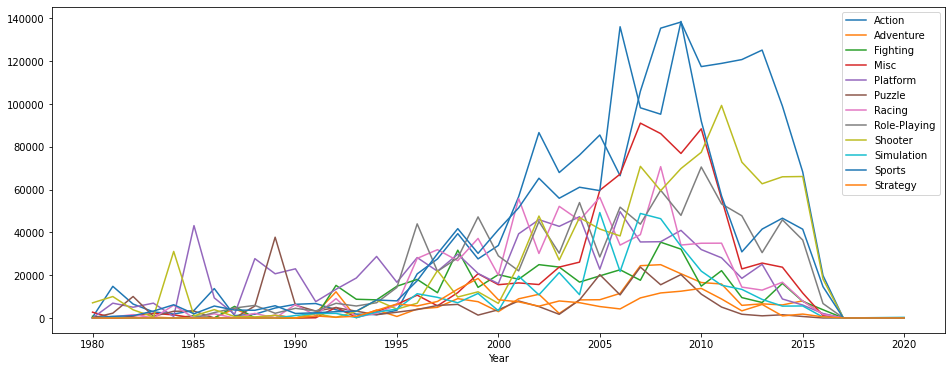

In [309]:
pivot_vgames.plot(kind='line', figsize=(16,6))
plt.legend(loc='best')

In [285]:
vgames_2_Genre_index = vgames_2_Genre.set_index(['Genre', 'Year','sales']).sort_index()
vgames_2_Genre_index

Empty DataFrame
Columns: []
Index: [(Action, 1980.0, 340.0), (Action, 1981.0, 160.0), (Action, 1981.0, 220.0), (Action, 1981.0, 220.0), (Action, 1981.0, 230.0), (Action, 1981.0, 290.0), (Action, 1981.0, 310.0), (Action, 1981.0, 320.0), (Action, 1981.0, 340.0), (Action, 1981.0, 350.0), (Action, 1981.0, 370.0), (Action, 1981.0, 380.0), (Action, 1981.0, 390.0), (Action, 1981.0, 400.0), (Action, 1981.0, 420.0), (Action, 1981.0, 450.0), (Action, 1981.0, 500.0), (Action, 1981.0, 590.0), (Action, 1981.0, 670.0), (Action, 1981.0, 700.0), (Action, 1981.0, 770.0), (Action, 1981.0, 790.0), (Action, 1981.0, 820.0), (Action, 1981.0, 930.0), (Action, 1981.0, 1970.0), (Action, 1981.0, 2200.0), (Action, 1982.0, 140.0), (Action, 1982.0, 150.0), (Action, 1982.0, 160.0), (Action, 1982.0, 220.0), (Action, 1982.0, 240.0), (Action, 1982.0, 280.0), (Action, 1982.0, 280.0), (Action, 1982.0, 310.0), (Action, 1982.0, 320.0), (Action, 1982.0, 340.0), (Action, 1982.0, 340.0), (Action, 1982.0, 370.0), (Action, 1982.0, 390.0), (Action, 1982.0, 500.0), (Action, 1982.0, 540.0), (Action, 1982.0, 620.0), (Action, 1982.0, 630.0), (Action, 1982.0, 670.0), (Action, 1983.0, 160.0), (Action, 1983.0, 290.0), (Action, 1983.0, 330.0), (Action, 1983.0, 340.0), (Action, 1983.0, 460.0), (Action, 1983.0, 510.0), (Action, 1983.0, 770.0), (Action, 1984.0, 1850.0), (Action, 1985.0, 20.0), (Action, 1985.0, 3500.0), (Action, 1986.0, 570.0), (Action, 1986.0, 1150.0), (Action, 1986.0, 1150.0), (Action, 1986.0, 1640.0), (Action, 1986.0, 2730.0), (Action, 1986.0, 6500.0), (Action, 1987.0, 460.0), (Action, 1987.0, 650.0), (Action, 1988.0, 230.0), (Action, 1988.0, 1510.0), (Action, 1989.0, 480.0), (Action, 1989.0, 4170.0), (Action, 1990.0, 1560.0), (Action, 1990.0, 2230.0), (Action, 1990.0, 2600.0), (Action, 1991.0, 60.0), (Action, 1991.0, 280.0), (Action, 1991.0, 420.0), (Action, 1991.0, 1390.0), (Action, 1991.0, 4610.0), (Action, 1992.0, 3840.0), (Action, 1993.0, 70.0), (Action, 1993.0, 70.0), (Action, 1993.0, 70.0), (Action, 1993.0, 220.0), (Action, 1993.0, 360.0), (Action, 1993.0, 1020.0), (Action, 1994.0, 30.0), (Action, 1994.0, 30.0), (Action, 1994.0, 70.0), (Action, 1994.0, 1420.0), (Action, 1995.0, 90.0), (Action, 1995.0, 110.0), (Action, 1995.0, 140.0), (Action, 1995.0, 350.0), (Action, 1995.0, 410.0), (Action, 1995.0, 450.0), (Action, 1995.0, 470.0), (Action, 1995.0, 1560.0), (Action, 1996.0, 30.0), (Action, 1996.0, 30.0), (Action, 1996.0, 30.0), (Action, 1996.0, 40.0), (Action, 1996.0, 90.0), (Action, 1996.0, 160.0), (Action, 1996.0, 160.0), ...]

[16241 rows x 0 columns]

In [286]:
def vgames_2(year, genre):
    data = vgames_2_Genre_index.loc[year, genre]

    plt.plot(data.index, data.values)


In [287]:
plt.figure(figsize = (18, 8))

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [288]:
a = vgames_mean.T
a.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')